In [20]:
import sys,os
# sys.path.append('/Users/tangweiyi/Desktop/lib_py')
import numpy as np
import pandas as pd
from Bio.PDB.PDBParser import PDBParser
import pack_analysisV3 as pack
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import shutil


###Run multiple Rosetta Design output and make the plot
### input 1) Path to directory of the rosetta output PDB files
### input 2) chains(no spacing) of the target protein interface eg. AB
### input 3) chain(single letter) of the "design TM antibody" eg. X
### input 4) the cutoff of finalscore to decide what hole-knob-pair details you what to print out
### input 5) the cutoff of filter to deicde whether this design worth going through 
### usage
### python RUNME.py . AB X 8

###The plotting part was meant to use on the jupyter notebook though

#################INPUT SECTION#############################3
# input_dir=sys.argv[3]
# chainABC_str = sys.argv[4]
# chainX_str=sys.argv[5]
# scorecutoff=float(sys.argv[6])


#####################INPUTSECTION##############################
input_dir='/home/sting-gpu/weiyi/design/Rosetta/setup5_output2/good_design'  
chainABC_str = 'AB'
chainX_str='X'
scorecutoff=7
thirdfilter=7
output_dir='/home/sting-gpu/weiyi/design/Rosetta/setup5_output2/good_packing/dalphaball'
###########################################################3

dir_files = os.listdir(input_dir)
pdb_files = [x for x in dir_files if x[-3:] == 'pdb']

# print(pdb_files)

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

result_outfile= open(os.path.join(output_dir,'printed_result.txt'),'a')
txt = '\n#  Good design finalscore is above ' +str(scorecutoff)+'\n'
txt+= '#  Design_name          finalscore   #packed_knobs\n'

detailed_result=open(os.path.join(output_dri))
    
print('\n -----------------------\n the output directory is built.')
    
parser   =PDBParser(QUIET=1)
num_knobs=np.zeros((len(pdb_files),7))

        
    
for num,input_PDB_name in enumerate(pdb_files): 
    if num%10==0:
        print('now it is ',num)
#   print(input_PDB_name)
    protein  = parser.get_structure(input_PDB_name,os.path.join(input_dir,input_PDB_name))[0]
    sum1,sum2,sum3,sum4,sum5,sum6,finalscore,packingnames   =pack.excute(protein,chainABC_str,chainX_str,scorecutoff,thirdfilter)
#   print(sum3,sum4,sum5,sum6,finalscore)
    #Huge matrix for further plotting
    num_knobs[num][0]=sum1  #holeABC pass the first filter, vector method
    num_knobs[num][1]=sum2	#holeX pass the first filter, vector method
    num_knobs[num][2]=sum3  #holeABC pass the second filter, sasa/chain
    num_knobs[num][3]=sum4  #holeX pass the second filter, sasa/chain
    num_knobs[num][4]=sum5  #holeABC pass the second filter,sasa/knob
    num_knobs[num][5]=sum6  #holeX pass the second filter, sasa/knob
    num_knobs[num][6]=finalscore #final score, fully packing +1, partially packing +0.5
    
    if finalscore >scorecutoff:
        
        #print out the result 
        print('*** good design,finalscore is above', scorecutoff,  '   ###', protein.get_parent().id)
        print('*** The finalscore is ', finalscore, 'there are',sum6+sum5, 'knobs packing into holes')
        for pair in packingnames:
            print(pair[0],pair[1])
        
        #writing all the print-out to a result txt
        txt+= str(input_PDB_name)+'         %.1f        '%finalscore + '%.1f'%(sum5+sum6)+'\n'
#         print(txt)
        
        
        #copy the good packing designs to a new directory
        outfile=os.path.join(output_dir,input_PDB_name)
        if not os.path.exists(outfile):
            print(outfile, 'is copying to the good_packing folding')
            shutil.copyfile(os.path.join(input_dir,input_PDB_name),outfile)


result_outfile.write(txt)
result_outfile.close()
            
            
            
#Huge matrix for further plotting            
knobs=num_knobs.T
knobsABC=knobs[:5:2]
knobsX= knobs[1:6:2]
knobsum=knobsABC+knobsX   # combine the #holeABC and #holeX in different filters





 -----------------------
 the output directory is built.
now it is  0
*** good design,finalscore is above 7    ### design_setup5_004-0017.pdb
*** The finalscore is  8 there are 8 knobs packing into holes
holeA8-9 ['knobX129']
holeB2-3 ['knobX128']
holeB9-10 ['knobX121']
holeB16-17 ['knobX114']
holeB23-24 ['knobX111']
holeX111-112 ['knobA26']
holeX118-119 ['knobA19']
holeX128-129 ['knobA5']
*** good design,finalscore is above 7    ### design_setup5_003-0022.pdb
*** The finalscore is  7.5 there are 8 knobs packing into holes
holeA8-9 ['knobX129']
holeB9-10 ['knobX121']
holeB16-17 ['knobX114']
holeB19-20 ['knobX114']
holeB23-24 ['knobX111']
holeX121-122 ['knobA12']
holeX125-126 ['knobA12']
holeX128-129 ['knobA5']
*** good design,finalscore is above 7    ### design_setup5_059-0002.pdb
*** The finalscore is  7.5 there are 8 knobs packing into holes
holeA8-9 ['knobX129']
holeB9-10 ['knobX121']
holeB16-17 ['knobX114']
holeB23-24 ['knobX111']
holeX111-112 ['knobA26']
holeX118-119 ['knobA19']


In [1]:
# print('+++++++++++++++++++++')
good_pack=os.listdir(output_dir)
good_pack_pdb=[x[-12:-3] for x in good_pack if x[-3:]=='pdb']
# print(good_pack_pdb)
good_design=os.listdir('/home/sting-gpu/weiyi/design/setup5_output2/good_design')
good_design_pdb=[x[-12:-3].replace('-','_') for x in good_design]
for pdb in good_pack_pdb:
    if pdb in good_design_pdb:
        print(pdb)
        

NameError: name 'os' is not defined

In [9]:
###########################Plotting the final score distribution#######################

import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import shutil

plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(knobs[6], color="salmon", label="finalscore", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.5)
plt.title('Final Score Distribution', fontsize=22)
plt.legend()
plt.show()
out_image_path=os.path.join(output_dir,'finalscore.png' )
plt.savefig(out_image_path, dpi=300,bbox_inches='tight')




NameError: name 'knobs' is not defined

<Figure size 1040x800 with 0 Axes>

/home/sting-gpu/qBits/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sting-gpu/qBits/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sting-gpu/qBits/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

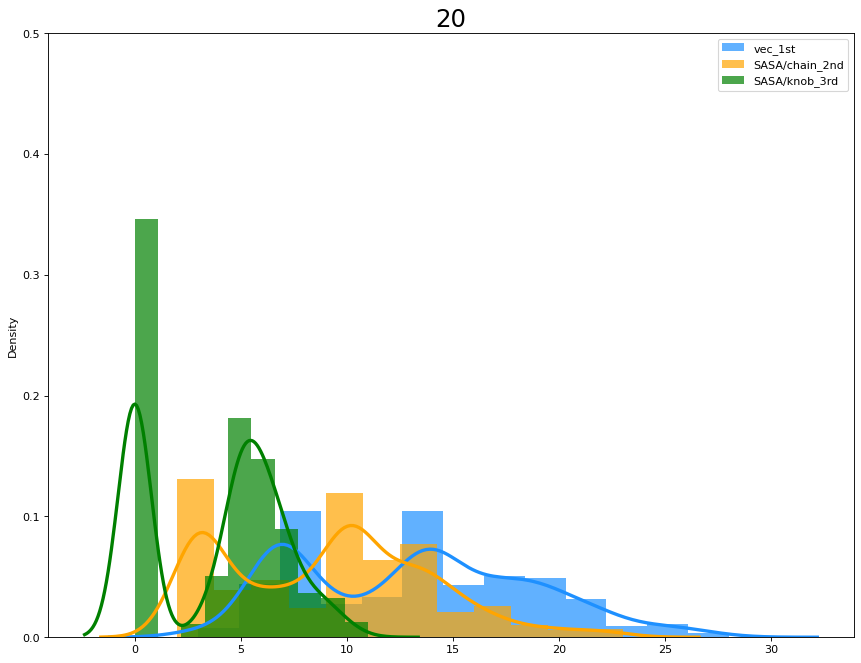

In [6]:
############################Plotting three-filtered results respectively##################
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(knobsum[0], color="dodgerblue", label="vec_1st", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(knobsum[1], color="orange", label="SASA/chain_2nd", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(knobsum[2], color="g", label="SASA/knob_3rd", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})


plt.ylim(0, 0.5)

plt.title('20', fontsize=22)
plt.legend()
plt.show()




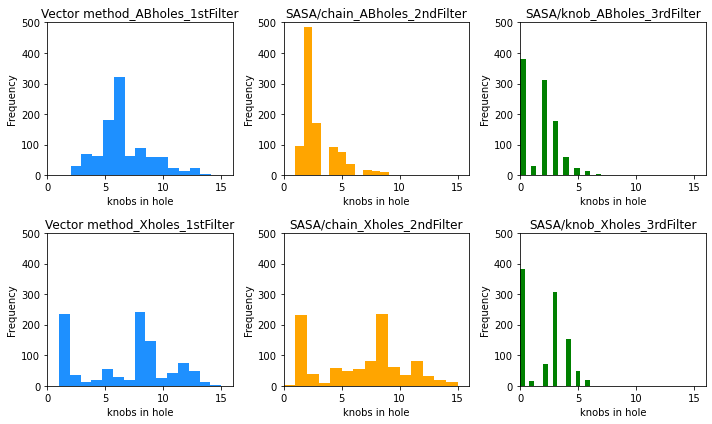

In [7]:

################################Consider the chainhole ABC seperated###############

fig,axes = plt.subplots(2,3,figsize=(10,6))
ax0,ax1,ax2,ax3,ax4,ax5=axes.flatten()
ax0.hist(knobs[0],15, histtype='bar',color='dodgerblue')
ax0.set(xlim=[0,16],ylim=[0,500],title='Vector method_ABholes_1stFilter',ylabel='Frequency',xlabel='knobs in hole')
ax1.hist(knobs[2],15,density=False, histtype='bar',color='orange')
ax1.set(xlim=[0,16],ylim=[0,500],title='SASA/chain_ABholes_2ndFilter',ylabel='Frequency',xlabel='knobs in hole')
ax2.hist(knobs[4],15,density=False, histtype='bar',color='g')
ax2.set(xlim=[0,16],ylim=[0,500],title='SASA/knob_ABholes_3rdFilter',ylabel='Frequency',xlabel='knobs in hole')


ax3.hist(knobs[1],15,density=False, histtype='bar',color='dodgerblue')
ax3.set(xlim=[0,16],ylim=[0,500],title='Vector method_Xholes_1stFilter',ylabel='Frequency',xlabel='knobs in hole')
ax4.hist(knobs[3],15,density=False, histtype='bar',color='orange')
ax4.set(xlim=[0,16],ylim=[0,500],title='SASA/chain_Xholes_2ndFilter',ylabel='Frequency',xlabel='knobs in hole')
ax5.hist(knobs[5],15,density=False, histtype='bar',color='g')
ax5.set(xlim=[0,16],ylim=[0,500],title='SASA/knob_Xholes_3rdFilter',ylabel='Frequency',xlabel='knobs in hole')

fig.tight_layout()
plt.show()




In [1]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB import *
import sys, os
import pack_analysisV3 as pack


###Run multiple Rosetta Design output and make the plot
### input 1) Path to directory of the rosetta output PDB files
### input 2) chains(no spacing) of the target protein interface eg. AB
### input 3) chain(single letter) of the "design TM antibody" eg. X
### input 4) the cutoff of finalscore to decide what hole-knob-pair details you what to print out
### input 5) the cutoff of filter to deicde whether this design worth going through 
### usage
### python RUNME.py . AB X 8

###The plotting part was meant to use on the jupyter notebook though

#################INPUT SECTION#############################3
# input_dir=sys.argv[3]
# chainABC_str = sys.argv[4]
# chainX_str=sys.argv[5]
# scorecutoff=float(sys.argv[6])


#####################INPUTSECTION##############################
# input_dir='/home/sting-gpu/weiyi/design/MD_input_files/design_059-0002/design_059-0002/lastFrame_run_500ns.pdb'
input_dir='/home/sting-gpu/weiyi/design/MD_input_files/design_059-0002/design_setup5_059-0002.pdb'

chainABC_str = 'AB'
chainX_str='X'
scorecutoff=0
thirdfilter=0

###########################################################3


# print(pdb_files)

input_PDB_name = input_dir.split('/')[-1]
print(input_PDB_name)
parser   = PDBParser(QUIET=1)
protein  = parser.get_structure(input_PDB_name,input_dir)[0]

residues=list(protein.get_residues())
# print(residues)
for res in residues:
    resid=res.get_id()
#     print(resid)
    resname=res.get_resname()
    if resname == "ACE" or resname == "NME":
        print(resname)
        res.get_parent().detach_child(resid)
        print(resid)

    

sum1,sum2,sum3,sum4,sum5,sum6,finalscore   =pack.excute(protein,chainABC_str,chainX_str,scorecutoff,thirdfilter)
print(sum1,sum2,sum3,sum4,sum5,sum6,finalscore )


design_setup5_059-0002.pdb
*** good design,finalscore is above 0    ### design_setup5_059-0002.pdb
*** The finalscore is  7.5 there are 8 knobs packing into holes
holeA8-9 ['knobX129']
holeB9-10 ['knobX121']
holeB16-17 ['knobX114']
holeB23-24 ['knobX111']
holeX111-112 ['knobA26']
holeX118-119 ['knobA19']
holeX121-122 ['knobA12']
holeX125-126 ['knobA12']
10 13 5 12 4 4 7.5


In [3]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB import *
import sys, os
import pack_analysisV3 as pack


#####################INPUTSECTION##############################
# input_dir='/home/sting-gpu/weiyi/design/MD/design_051_0007/wkr/lastFrame_run_npt.pdb'
# input_dir='/home/sting-gpu/weiyi/design/MD_input_files/design_051_0007/wkr/lastFrame_run_em.pdb'

# input_dir='/home/sting-gpu/weiyi/design/MD_input_files/design_051_0007/wkr/lastFrame_run.pdb'
# input_dir='/home/sting-gpu/weiyi/design/MD_input_files/design_059-0002/design_setup5_059-0002.pdb'
# input_dir ='/home/sting-gpu/weiyi/design/MD/design_019_0006/design_019_0006/lastframenpt.pdb'
input_dir ='/home/sting-gpu/weiyi/design/MD/design_019_0006/design_019_0006/lastFrame_testrun.pdb'

chainABC_str = 'FC'
chainX_str='A'
scorecutoff=0
thirdfilter=0

###########################################################3


# print(pdb_files)

input_PDB_name = input_dir.split('/')[-1]
print(input_PDB_name)
parser   = PDBParser(QUIET=1)
protein  = parser.get_structure(input_PDB_name,input_dir)[0]

residues=list(protein.get_residues())
# print(residues)
for res in residues:
    resid=res.get_id()
#     print(resid)
    resname=res.get_resname()
    if resname == "ACE" or resname == "NME":
        print(resname)
        res.get_parent().detach_child(resid)
        print(resid)




sum1,sum2,sum3,sum4,sum5,sum6,finalscore,packingnames=pack.excute(protein,chainABC_str,chainX_str,scorecutoff,thirdfilter)
print(sum1,sum2,sum3,sum4,sum5,sum6,finalscore )



lastFrame_testrun.pdb
ACE
(' ', 105, ' ')
NME
(' ', 132, ' ')
ACE
(' ', 0, ' ')
ACE
(' ', 0, ' ')
ACE
(' ', 0, ' ')
ACE
(' ', 0, ' ')
ACE
(' ', 0, ' ')
9 11 6 9 4 1 5


In [ ]:
input_dir='/home/sting-gpu/weiyi/design/MD_input_files/design_059-0002/trajrmsd_6to23.dat'
oF=open(input_dir,'r')
for line in oF.readlines():
    